In [1]:
import pandas as pd
from pandas.api.types import is_numeric_dtype

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

from sklearn.preprocessing import LabelEncoder

from numpy import array

import matplotlib.pyplot as plt
import time
from statistics import mean as mean

2022-12-12 14:06:13.994354: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-12 14:06:13.994399: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
from numpy.random import seed
seed (3968)

In [3]:
iris = pd.read_csv ("http://raptor.kent.ac.uk/~ds756/Data/iris.csv")
Species = iris.Species.unique ()
Species

array(['setosa', 'versicolor', 'virginica'], dtype=object)

<p style="font-size:20px">_____________________________________________________________________________________</p>
<p style="font-size:20px">Build a classifier for the iris dataset.</p>
<p style="font-size:20px">The first step, construct the training data.</p>

In [4]:
# Pre-process our continuous features.
#  1. Scale
#  2. Translate

data = iris
data = data.drop (columns = "Mono")

for u in data:
    if is_numeric_dtype (data[u]):
        data[u] -= data[u].mean ()            # -1 ≤ x ≤ 1, mean (data[u]) == 0.0
        data[u] /= data[u].max ()             # 0 ≤ x ≤ 1
        print (data[u].mean ())

data.describe ()

-2.1316282072803005e-16
-2.3684757858670006e-16
-2.3684757858670006e-16
-1.4210854715202004e-16


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.131628e-16,-2.368476e-16,-2.368476e-16,-1.421085e-16
std,4.026253e-01,3.246273e-01,5.618390e-01,5.860361e-01
min,-7.504052e-01,-7.874876e-01,-8.777849e-01,-8.452076e-01
25%,-3.614263e-01,-1.916584e-01,-6.868237e-01,-6.914403e-01
50%,-2.106969e-02,-4.270109e-02,1.884150e-01,7.739621e-02
75%,2.706645e-01,1.807349e-01,4.271165e-01,4.618145e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [5]:
# Extract the values from the dataframe into an array
dataset = data.values

# Split off our input features
x = dataset[:, 0:4].astype(float)

# Split off our species
Labels = dataset [:, 4] 
Labels

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

<p style="font-size:20px">_____________________________________________________________________________________</p>

<p style="font-size:20px">Hot-encode our species.  This is done as follows:</p>

<ul style="font-size:20px">
    <li>Discover all of the unique labels and assign them a unique integers.</li>  
    <li>The integers corrospond to indices in the hot-encoded vector.</li>
    <li>Build a vector of integers corrosponding to their labels.</li>
    <li>Request Keras to build our ANN.</li>
    <li>Build an array of vectors where only the correct entry has a 1.</li>
</ul>

In [6]:

Hot = LabelEncoder ()

# 1. Find the unique labels and assign indices
Hot.fit (Labels)                      

# 2. Build a vector of indices
HotLabels = Hot.transform (Labels)    

# Finally, build the vectors (3)
TrainingLabels = np_utils.to_categorical (HotLabels) 

In [7]:
HotLabels


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
TrainingLabels

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

<p style="font-size:20px">_____________________________________________________________________________________</p>
<p style="font-size:20px">We have prepared our data, now specify the ANN</p>

In [9]:
# Keras container for our model
model = Sequential()                                                 

# input vector of dim 4, for our 4 predictors
model.add (Dense (8, input_dim=4, activation='sigmoid'))    

# Second layer, 8 neurons
model.add (Dense(8, activation='relu'))                              

# Softmax layer for classification
model.add (Dense (3, activation='softmax'))                          

# Having specified the topology we now build the ANN
model.compile (loss='categorical_crossentropy', optimizer='adam')    

model.summary ()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


2022-12-12 14:06:15.672550: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-12 14:06:15.672620: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-12 14:06:15.672645: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter): /proc/driver/nvidia/version does not exist
2022-12-12 14:06:15.672879: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<p style="font-size:20px">_____________________________________________________________________________________</p>
<p style="font-size:20px">We have our training data, and our ANN, we can train the ANN now.</p>

In [10]:
start_time = time.time ()

h = model.fit (x, TrainingLabels, verbose=False, epochs = 5000)

dt = time.time () - start_time
dt

24.57672643661499

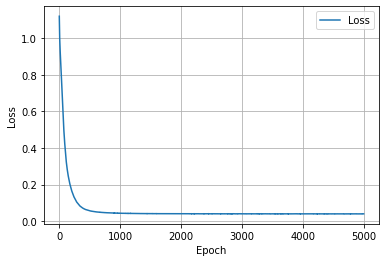

In [11]:
def LossHistory (history):
  plt.plot (history.history['loss'], label='Loss')
  plt.xlabel ('Epoch')
  plt.ylabel ('Loss')
  plt.legend ()
  plt.grid (True)
  plt.show ()

LossHistory (h)

In [12]:
query = array([x[111, ]])  # How did we do?  Let's try one

In [13]:
# Simulate Softmax

def Inference (x):
    p0 = list (model.predict (query)[0])
    return Species[p0.index (max (p0))]

In [14]:
Inference (query) == iris.Species[111]

True

In [15]:
for i in range (0, 150):
    query = array ([x[i, ]])
    if Inference (query) != iris.Species[i]:
        print (i, Inference (query), iris.Species[i])


83 virginica versicolor
133 versicolor virginica
